In [13]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import matplotlib.colors as col

# Erstens Vorbereitung

In [14]:
sns.set()
cmap = sns.color_palette("magma")

In [3]:
datapath = "../Daten/"
zylFiles = []
for file in os.listdir(datapath+"Zyinder"):
    if file.endswith(".dat"):
        print(file)
        zylFiles.append(os.path.join(datapath+"Zyinder",file))

Zylinder_1.dat
Zylinder_10.dat
Zylinder_11.dat
Zylinder_12.dat
Zylinder_2.dat
Zylinder_3.dat
Zylinder_4.dat
Zylinder_5.dat
Zylinder_6.dat
Zylinder_7.dat
Zylinder_8.dat
Zylinder_9.dat


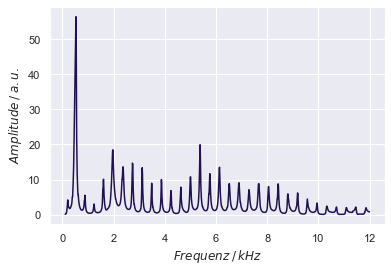

In [4]:
for file in zylFiles:
    plt.clf()
    plt.close()
    fig = plt.figure()
    ax = fig.add_subplot()
    freq, amp = np.genfromtxt(file,unpack=True)
    ax.plot(freq/1000,amp,c=cmap[0])
    plt.xlabel(r"$Frequenz\:/\: kHz$")
    plt.ylabel(r"$Amplitude\:/\: a.u.$")
    plt.savefig(file.replace(".dat",".pdf"))

# Wasserstoffatom

In [15]:
wassFiles = []
for file in os.listdir(datapath+"Wasserstoff"):
    if file.endswith(".dat"):
        print(file)
        wassFiles.append(os.path.join(datapath+"Wasserstoff",file))

H_0.dat
H_10.dat
H_100.dat
H_110.dat
H_120.dat
H_130.dat
H_140.dat
H_150.dat
H_160.dat
H_170.dat
H_180.dat
H_20.dat
H_30.dat
H_3mm.dat
H_40.dat
H_50.dat
H_60.dat
H_6mm.dat
H_70.dat
H_80.dat
H_90.dat
H_9mm_0.dat
H_9mm_10.dat
H_9mm_100.dat
H_9mm_110.dat
H_9mm_120.dat
H_9mm_130.dat
H_9mm_140.dat
H_9mm_150.dat
H_9mm_160.dat
H_9mm_170.dat
H_9mm_180.dat
H_9mm_20.dat
H_9mm_30.dat
H_9mm_40.dat
H_9mm_50.dat
H_9mm_60.dat
H_9mm_70.dat
H_9mm_80.dat
H_9mm_90.dat


In [16]:
from scipy.signal import find_peaks

../Daten/Wasserstoff/H_180.dat


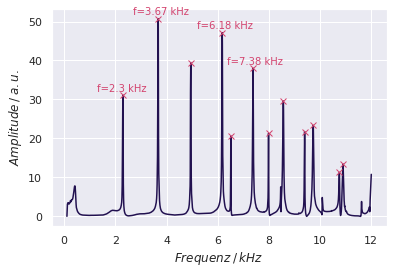

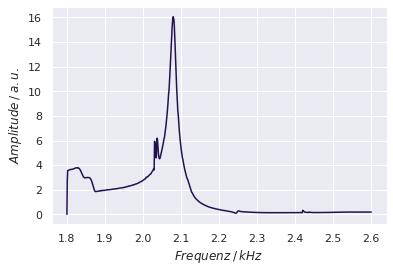

In [17]:
peakFreq = []
peaksat=[]
for file in wassFiles:
    plt.clf()
    plt.close()
    
    freq, amp = np.genfromtxt(file,unpack=True)
    
        
    plt.plot(freq/1000,amp,c=cmap[0])
    if "H_180.dat" in file:
        print(file)
        peaks,_ = find_peaks(amp, height=8)
        
        plt.plot(freq[peaks]/1000,amp[peaks],'x',c=cmap[3])
        for i,peak in enumerate(peaks):
            if i < 6 and i != 2 and i != 4:
                peakFreq.append(freq[peak])
                peaksat.append(peak)
                text = "{}".format(np.around(freq[peak]/1000,2))
                plt.text(freq[peak]/1000-1,amp[peak]+1,r"f="+text+r" kHz",color='C1', fontsize='small',c=cmap[3])
    plt.xlabel(r"$Frequenz\:/\: kHz$")
    plt.ylabel(r"$Amplitude\:/\: a.u.$")
    if "H_180.dat" in file:
        plt.show()
    plt.savefig(file.replace(".dat",".pdf"))
    

In [18]:
peaksat

[438, 713, 1214, 1455]

In [19]:
filesWinkel = ["H_{}.dat".format(n) for n in range(0,181,10)]
print(filesWinkel)
peaklocs = []
peak1 = []
peak2 = []
peak3 = []
peak4 = []
for file in filesWinkel:
    filepath= os.path.join(datapath+"Wasserstoff",file)
    print(filepath)
    freq, amp = np.genfromtxt(filepath,unpack=True)
    
    peaks,_ = find_peaks(amp, height=9)
    freq = freq[peaksat]
    amp = amp[peaksat]
    peak1.append(amp[0])
    peak2.append(amp[1])
    peak3.append(amp[2])
    peak4.append(amp[3])
    peaklocs.append(freq)

['H_0.dat', 'H_10.dat', 'H_20.dat', 'H_30.dat', 'H_40.dat', 'H_50.dat', 'H_60.dat', 'H_70.dat', 'H_80.dat', 'H_90.dat', 'H_100.dat', 'H_110.dat', 'H_120.dat', 'H_130.dat', 'H_140.dat', 'H_150.dat', 'H_160.dat', 'H_170.dat', 'H_180.dat']
../Daten/Wasserstoff/H_0.dat
../Daten/Wasserstoff/H_10.dat
../Daten/Wasserstoff/H_20.dat
../Daten/Wasserstoff/H_30.dat
../Daten/Wasserstoff/H_40.dat
../Daten/Wasserstoff/H_50.dat
../Daten/Wasserstoff/H_60.dat
../Daten/Wasserstoff/H_70.dat
../Daten/Wasserstoff/H_80.dat
../Daten/Wasserstoff/H_90.dat
../Daten/Wasserstoff/H_100.dat
../Daten/Wasserstoff/H_110.dat
../Daten/Wasserstoff/H_120.dat
../Daten/Wasserstoff/H_130.dat
../Daten/Wasserstoff/H_140.dat
../Daten/Wasserstoff/H_150.dat
../Daten/Wasserstoff/H_160.dat
../Daten/Wasserstoff/H_170.dat
../Daten/Wasserstoff/H_180.dat


In [20]:
peakall = [peak1,peak2,peak3,peak4]

In [32]:
from scipy.special import legendre

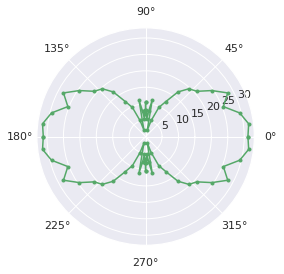

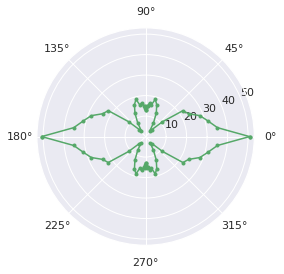

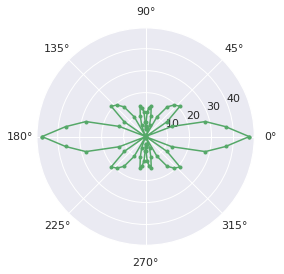

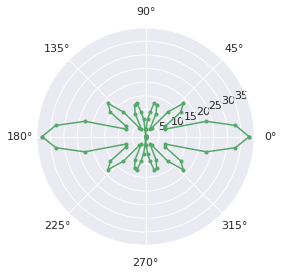

In [39]:
theta = np.arange(0,181,10)*2*np.pi/360
phi = np.arccos(0.5*np.cos(theta) - 0.5)
for i,p in enumerate(peakall):
    plt.clf()
    plt.close()
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.plot(phi,p,'.-',c="C2")
    ax.plot(-phi,p,'.-',c="C2")
    ax.plot(np.pi+phi,p,'.-',c="C2")
    ax.plot(np.pi-phi,p,'.-',c="C2")
    plt.savefig(os.path.join("../Daten/Wasserstoff","peak{}.pdf".format(i)))
    plt.show()
    

1


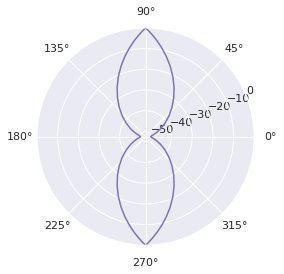

2


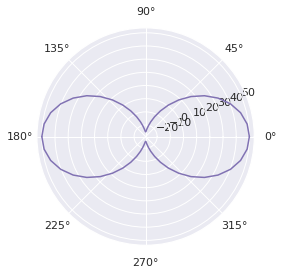

4


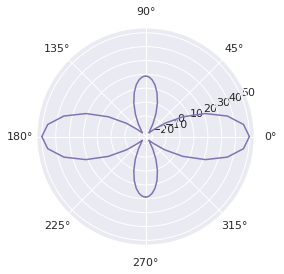

5


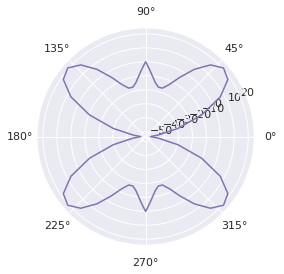

In [40]:
theta = np.arange(0,181,10)*2*np.pi/360
phi = np.arccos(0.5*np.cos(theta) - 0.5)
ns = [1,2,4,5]
for i,p in enumerate(peakall):
    plt.clf()
    plt.close()
    print(ns[i])
    pN = 50*legendre(ns[i])
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(phi,pN(np.cos(phi)),c="C4")
    ax.plot(-phi,pN(np.cos(phi)),c="C4")
    ax.plot(np.pi+phi,pN(np.cos(phi)),c="C4")
    ax.plot(np.pi-phi,pN(np.cos(phi)),c="C4")
    plt.show()

Festkörper

In [4]:
datapath = "../Daten/"
FKPfiles = []
for file in os.listdir(datapath+"Festkörper"):
    if file.endswith(".dat"):
        print(file)
        FKPfiles.append(os.path.join(datapath+"Festkörper",file))

FK1_16mm_1.dat
FK1_16mm_2.dat
FK1_16mm_3.dat
FK1_16mm_4.dat
FK1_16mm_5.dat
FK1_16mm_6.dat
FK1_16mm_7.dat
FK1_16mm_8.dat
FK1_16mm_9.dat
FK2_10mm_1.dat
FK2_10mm_3.dat
FK2_10mm_9.dat
FK2_13mm_1.dat
FK2_13mm_3.dat
FK2_13mm_9.dat
FK3_16mm_37-5mm.dat
FK3_16mm_62-5mm.dat
FK3_16mm_75mm.dat
FK4.dat
FK5.dat
FK_50mm.dat
FK_75mm.dat


['../Daten/Festkörper/FK1_16mm_1.dat',
 '../Daten/Festkörper/FK1_16mm_2.dat',
 '../Daten/Festkörper/FK1_16mm_3.dat',
 '../Daten/Festkörper/FK1_16mm_4.dat',
 '../Daten/Festkörper/FK1_16mm_5.dat',
 '../Daten/Festkörper/FK1_16mm_6.dat',
 '../Daten/Festkörper/FK1_16mm_7.dat',
 '../Daten/Festkörper/FK1_16mm_8.dat',
 '../Daten/Festkörper/FK1_16mm_9.dat',
 '../Daten/Festkörper/FK2_10mm_1.dat',
 '../Daten/Festkörper/FK2_10mm_3.dat',
 '../Daten/Festkörper/FK2_10mm_9.dat',
 '../Daten/Festkörper/FK2_13mm_1.dat',
 '../Daten/Festkörper/FK2_13mm_3.dat',
 '../Daten/Festkörper/FK2_13mm_9.dat',
 '../Daten/Festkörper/FK3_16mm_37-5mm.dat',
 '../Daten/Festkörper/FK3_16mm_62-5mm.dat',
 '../Daten/Festkörper/FK3_16mm_75mm.dat',
 '../Daten/Festkörper/FK4.dat',
 '../Daten/Festkörper/FK5.dat',
 '../Daten/Festkörper/FK_50mm.dat',
 '../Daten/Festkörper/FK_75mm.dat']

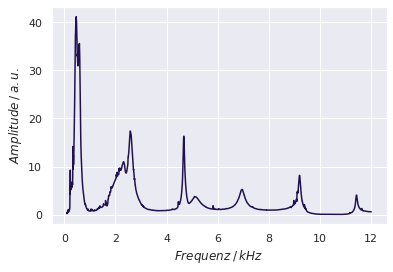

In [5]:
for file in FKPfiles:
    plt.clf()
    plt.close()
    fig = plt.figure()
    ax = fig.add_subplot()
    freq, amp = np.genfromtxt(file,unpack=True)
    ax.plot(freq/1000,amp,c=cmap[0])
    plt.xlabel(r"$Frequenz\:/\: kHz$")
    plt.ylabel(r"$Amplitude\:/\: a.u.$")
    plt.savefig(file.replace(".dat",".pdf"))